In [3]:
import pandas as pd
df=pd.read_csv("Salary_Data (2).csv")
df               

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


YearsExperience    0
Salary             0
dtype: int64

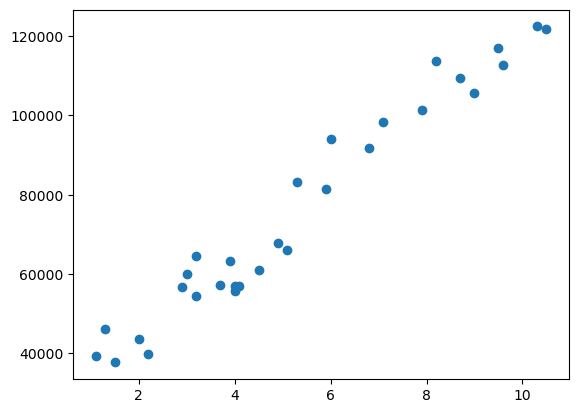

C:\Users\rasul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


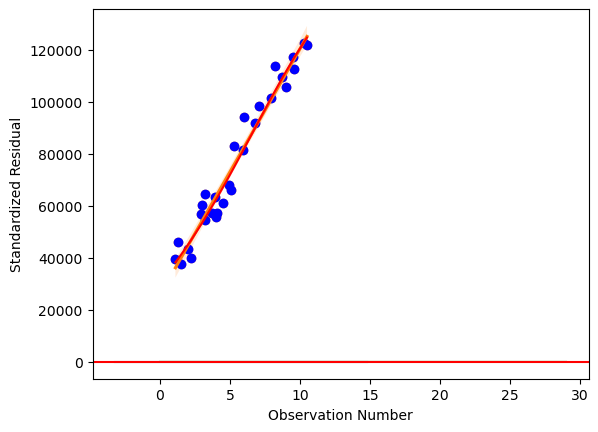

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()
df.corr()
df.describe()
import seaborn as sns
sns.distplot(df["YearsExperience"])
sns.regplot(x=df['YearsExperience'],y=df['Salary'])
import statsmodels.formula.api as smf
model1=smf.ols("Salary~YearsExperience",data=df).fit()
model1.summary()
model1.params  
model1.tvalues , model1.pvalues
model1.rsquared 
pred=model1.predict(df["YearsExperience"])
pred
import numpy as np
rmse_lin=np.sqrt(np.mean((np.array(df["Salary"])-
                          np.array(pred))**2))
model2 = smf.ols("Salary~np.log(YearsExperience)",data=df).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(df['YearsExperience'])) 
pred2.corr(df["Salary"])
rmse_log=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2)) 
model3=smf.ols("np.log(Salary)~YearsExperience",data=df).fit()
model3.summary()
model3.params
pred_log = model3.predict(pd.DataFrame(df['YearsExperience']))
pred3=np.exp(pred_log) 
rmse_exp = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred3))**2)) 
df["YearsExperience_sq"]=df["YearsExperience"]*df["YearsExperience"]
model3_quad= smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",
                 data=df).fit()
model3_quad.summary()
model3_quad.params
pred_quad=model3_quad.predict(df)
pred4=np.exp(pred_quad)  
rmse_quad=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred4))**2))

plt.scatter(df["YearsExperience"],df["Salary"],c="b")
plt.plot(df["YearsExperience"],pred4,"r") 
plt.plot(np.arange(30),model3_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model1.rsquared,model2.rsquared,
                             model3.rsquared,model3_quad.rsquared])}
table=pd.DataFrame(data)
table